## Modal test

This notebook uses Modal to run code remotely. Before running this notebook, you need to authenticate:

```bash
uv run modal setup
```

Then restart the notebook kernel.

In [1]:
import matplotlib
import modal

app = modal.App(
    image=modal.Image
        .debian_slim()
        .pip_install(f"matplotlib=={matplotlib.__version__}")
)

@app.function()
def train(epochs: int):
    from time import sleep
    import matplotlib.pyplot as plt

    for i in range(epochs):
        fig, ax = plt.subplots()
        ax.plot(range(i+1), [x**2 for x in range(i+1)])
        yield fig
        plt.close(fig)
        sleep(1)


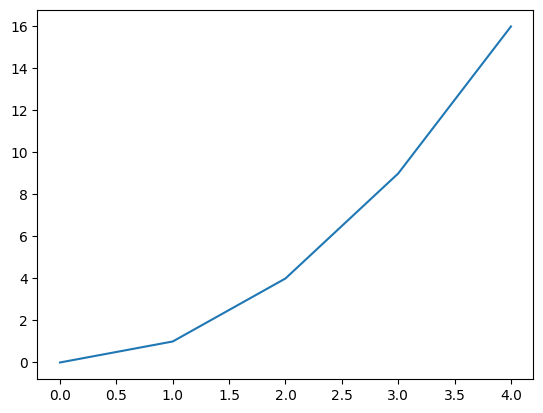

In [2]:
from IPython.display import clear_output, display
import matplotlib.pyplot as plt

with app.run():
    for f in train.remote_gen(5):
        clear_output(wait=True)
        display(f)
        plt.close(f)